In [1]:
import glob

import matplotlib.pyplot as plt
from ovito.io import import_file, export_file
from ovito.modifiers import BondAnalysisModifier, CreateBondsModifier

In [8]:
# Set up data pipeline:
path_to_input = "/Users/y1u0d2/desktop/Lab/data/xsf/data_coesite/data_coesite_995.xsf"
pipeline = import_file(path_to_input)
pipeline.modifiers.append(CreateBondsModifier(cutoff = 3.2))
pipeline.modifiers.append(BondAnalysisModifier(bins = 100))

# Export bond angle distribution to an output text file.
export_file(pipeline, 'bond_angles.txt', 'txt/table', key='bond-angle-distr')

# Convert bond length histogram to a NumPy array and print it to the terminal.
data = pipeline.compute()
print(data.tables['bond-length-distr'].xy())

[[0.02 0.  ]
 [0.06 0.  ]
 [0.1  0.  ]
 [0.14 0.  ]
 [0.18 0.  ]
 [0.22 0.  ]
 [0.26 0.  ]
 [0.3  0.  ]
 [0.34 0.  ]
 [0.38 0.  ]
 [0.42 0.  ]
 [0.46 0.  ]
 [0.5  0.  ]
 [0.54 0.  ]
 [0.58 0.  ]
 [0.62 0.  ]
 [0.66 0.  ]
 [0.7  0.  ]
 [0.74 0.  ]
 [0.78 0.  ]
 [0.82 0.  ]
 [0.86 0.  ]
 [0.9  0.  ]
 [0.94 0.  ]
 [0.98 0.  ]
 [1.02 0.  ]
 [1.06 0.  ]
 [1.1  0.  ]
 [1.14 0.  ]
 [1.18 0.  ]
 [1.22 0.  ]
 [1.26 0.  ]
 [1.3  0.  ]
 [1.34 1.  ]
 [1.38 0.  ]
 [1.42 1.  ]
 [1.46 0.  ]
 [1.5  0.  ]
 [1.54 2.  ]
 [1.58 1.  ]
 [1.62 4.  ]
 [1.66 3.  ]
 [1.7  6.  ]
 [1.74 2.  ]
 [1.78 5.  ]
 [1.82 1.  ]
 [1.86 1.  ]
 [1.9  2.  ]
 [1.94 0.  ]
 [1.98 2.  ]
 [2.02 1.  ]
 [2.06 0.  ]
 [2.1  0.  ]
 [2.14 0.  ]
 [2.18 0.  ]
 [2.22 0.  ]
 [2.26 0.  ]
 [2.3  0.  ]
 [2.34 0.  ]
 [2.38 0.  ]
 [2.42 0.  ]
 [2.46 1.  ]
 [2.5  3.  ]
 [2.54 2.  ]
 [2.58 1.  ]
 [2.62 3.  ]
 [2.66 5.  ]
 [2.7  2.  ]
 [2.74 7.  ]
 [2.78 3.  ]
 [2.82 5.  ]
 [2.86 3.  ]
 [2.9  4.  ]
 [2.94 2.  ]
 [2.98 2.  ]
 [3.02 4.  ]
 [3.06 2.  ]

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from ovito.io import import_file
from ovito.modifiers import BondAnalysisModifier

from utils.constants.dir_path import DataDirPath

xsf = DataDirPath.xsf()

# Load LAMMPS data file with bonds and compute bond angle distribution partitioned by bond type:
pipeline = import_file(path_to_input)
pipeline.modifiers.append(CreateBondsModifier(cutoff = 10))
pipeline.modifiers.append(BondAnalysisModifier(partition=BondAnalysisModifier.Partition.ByParticleType))
data = pipeline.compute()

# Retrieve y-property array from output DataTable:
histogram = data.tables['bond-angle-distr'].y

export_file(pipeline, 'bond_angles.txt', 'txt/table', key='bond-length-distr')

# Print the individual columns of the vector-valued property array:
# for column, name in enumerate(histogram.component_names):
#     print("Angle distribution for bond types:", name)
#     fig, ax = plt.subplots()
#     ax.set_title(f'{name}')
#     ax.plot(range(1,181), histogram[:,column])

Angle distribution for bond types: O-O-O
[   7   25   60   74   99   99  133  139  169  200  248  275  296  340
  483  565  689  778  776  797  856  804  857  948  897  940 1027  992
 1025 1069 1083 1174 1319 1323 1442 1527 1443 1343 1308 1281 1335 1373
 1338 1354 1496 1473 1557 1637 1578 1651 1720 1880 1914 1972 2026 1903
 2056 1906 1989 1852 1885 2038 1935 1931 1948 1988 1949 1972 2027 2038
 2100 2146 2106 2136 2268 2166 2180 2208 2284 2273 2253 2183 2123 2205
 2230 2229 2169 2272 2200 2114 2222 2161 2172 2269 2344 2227 2113 2201
 2199 2263 2174 2205 2222 2166 2126 2228 2159 2207 2007 2105 2084 2154
 2068 2043 2001 2001 1954 1983 1950 1897 1810 1877 1771 1907 1888 1966
 1892 1825 1793 1768 1684 1656 1595 1612 1587 1448 1471 1480 1450 1408
 1417 1419 1328 1407 1362 1335 1220 1177 1114 1104 1023 1070 1006  957
  944  934  942  900  870  828  846  694  674  633  573  514  461  407
  441  366  348  313  303  245  215  216  165  121   92   20]
Angle distribution for bond types: O-O-Si
[  

In [55]:
import csv
file = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/out_txt/alpha-quartz/alpha-quartz_635.txt'
csv_f = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv'
with open(file, mode='r') as f:
    l_strip = [s.strip() for s in f.readlines()][1:]
    df = pd.DataFrame(columns=l_strip[0].split(' ')[1:])
    for line in l_strip[1:]:
        line = line.split(' ')
        df.append(line)
df

,Angle,O-O-O,O-O-Si,Si-O-Si,O-Si-O,O-Si-Si,Si-Si-Si


In [51]:
import pandas as pd
df = pd.read_csv(f'{csv_f}/test.csv', index_col='Angle')
df = df.T

In [52]:
df.insert(0, 'structure', 'coesite')

In [48]:
# plot adf
from utils.constants.constants import Constants
import glob

csv_path = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv_w'
structures = Constants.structures()
all_path = []
for structure in structures:
    files = glob.glob(f'{csv_path}/{structure}/*')
    for file in files:
        all_path.append(file)
print(len(all_path))

8550


In [47]:
output = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv_w'
structure_natoms = Constants.structures_natom()
space = [str(i) for i in np.linspace(0.5,179.5,180).tolist()]
for file in all_path:
    structure = file.split('/')[-2]
    structure_idx = file.split('/')[-1].split('.')[0].split('_')[-1]
    df = pd.read_csv(file)
    for i in space:
        df[f'{i}_w'] = df[i] / structure_natoms[structure]
    df.to_csv(f'{output}/{structure}/{structure}_{structure_idx}.csv')
    # df_tmp = pd.read_csv(file)
    # df = pd.concat([df, df_tmp])

<ipython-input-47-7455bec3aa5c>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i}_w'] = df[i] / structure_natoms[structure]


In [51]:
output = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv_w'
structures = Constants.structures()
all_path = []
for structure in structures:
    files = glob.glob(f'{output}/{structure}/*.csv')
    for file in files:
        all_path.append(file)

df = pd.read_csv(all_path[0])
for i in all_path[1:]:
    tmp = pd.read_csv(i)
    df = pd.concat([df, tmp])
df.to_csv('/Users/y1u0d2/desktop/Lab/result/adf/ovito/all_format.csv')

In [70]:
df_new.to_csv(f'{csv_path}/all.csv', index=False)

In [71]:
df = pd.read_csv(f'{csv_path}/all.csv')
space = [str(i) for i in np.linspace(0.5,179.5,180).tolist()]

,bond,structure,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,...,170.5,171.5,172.5,173.5,174.5,175.5,176.5,177.5,178.5,179.5
0,O-O-O,alpha-critobalite,140,301,273,139,159,131,77,17,...,241,171,140,141,224,370,636,880,765,298
1,O-O-Si,alpha-critobalite,4,9,80,215,445,537,625,764,...,1040,972,743,615,509,393,249,135,51,5
2,Si-O-Si,alpha-critobalite,0,0,0,2,8,18,38,53,...,104,95,49,48,54,74,199,362,355,136
3,O-Si-O,alpha-critobalite,13,48,75,82,58,66,77,75,...,218,131,71,75,67,76,62,44,34,19
4,O-Si-Si,alpha-critobalite,29,66,114,118,207,221,280,272,...,338,273,176,121,102,134,93,105,70,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51295,O-O-Si,stishovite,993,448,453,944,235,1660,1662,2273,...,4401,2425,2741,1851,1178,962,1304,1452,771,497
51296,Si-O-Si,stishovite,32,64,78,178,7,454,115,253,...,1109,939,188,368,330,259,726,136,102,64
51297,O-Si-O,stishovite,96,148,108,258,518,576,269,558,...,1446,614,555,296,562,520,261,119,137,2925
51298,O-Si-Si,stishovite,224,388,316,107,603,929,388,1261,...,2210,1793,1269,410,908,582,134,308,384,235


<ipython-input-65-c54a032666a2>:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df.mean()[180:]
<ipython-input-65-c54a032666a2>:18: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df.std()[180:]


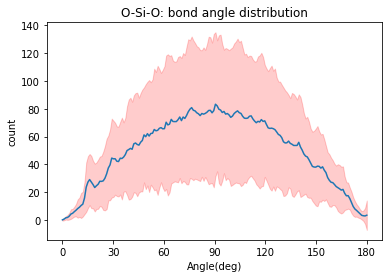

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.constants.constants import Constants

space = [str(i) for i in np.linspace(0.5,179.5,180).tolist()]
csv_path = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/csv_w'
save_dir = '/Users/y1u0d2/desktop/Lab/result/adf/ovito/pic'
structures_natoms = Constants.structures_natom()
df = pd.read_csv(f'{csv_path}/all.csv')
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df.rename(columns={'Unnamed: 0.1.1':'bond'}, inplace=True)
bond = 'O-Si-O'
df = df[df.bond == bond]
# angle = df.columns[2:]
x = np.linspace(0,180,180)
mean = df.mean()[180:]
std = df.std()[180:]
fig, ax = plt.subplots()
ax.set_xticks([0, 30, 60, 90, 120, 150, 180])
ax.set_title(f'{bond}: bond angle distribution')
ax.set_xlabel('Angle(deg)')
ax.set_ylabel('count')
ax.plot(x, mean)
ax.fill_between(x, mean + std, mean - std, alpha=0.2, color='red')
fig.savefig(f'{save_dir}/{bond}.png')

In [30]:
tmp = df.copy()

In [32]:
tmp2 = df[(df.structure == 'coesite') & (df.bond == 'O-O-O')].iloc[:,2:] / int(natom_o)

In [38]:
x = np.linspace(0.5,179.5,180).tolist()

In [39]:
x

[0.5,
 1.5,
 2.5,
 3.5,
 4.5,
 5.5,
 6.5,
 7.5,
 8.5,
 9.5,
 10.5,
 11.5,
 12.5,
 13.5,
 14.5,
 15.5,
 16.5,
 17.5,
 18.5,
 19.5,
 20.5,
 21.5,
 22.5,
 23.5,
 24.5,
 25.5,
 26.5,
 27.5,
 28.5,
 29.5,
 30.5,
 31.5,
 32.5,
 33.5,
 34.5,
 35.5,
 36.5,
 37.5,
 38.5,
 39.5,
 40.5,
 41.5,
 42.5,
 43.5,
 44.5,
 45.5,
 46.5,
 47.5,
 48.5,
 49.5,
 50.5,
 51.5,
 52.5,
 53.5,
 54.5,
 55.5,
 56.5,
 57.5,
 58.5,
 59.5,
 60.5,
 61.5,
 62.5,
 63.5,
 64.5,
 65.5,
 66.5,
 67.5,
 68.5,
 69.5,
 70.5,
 71.5,
 72.5,
 73.5,
 74.5,
 75.5,
 76.5,
 77.5,
 78.5,
 79.5,
 80.5,
 81.5,
 82.5,
 83.5,
 84.5,
 85.5,
 86.5,
 87.5,
 88.5,
 89.5,
 90.5,
 91.5,
 92.5,
 93.5,
 94.5,
 95.5,
 96.5,
 97.5,
 98.5,
 99.5,
 100.5,
 101.5,
 102.5,
 103.5,
 104.5,
 105.5,
 106.5,
 107.5,
 108.5,
 109.5,
 110.5,
 111.5,
 112.5,
 113.5,
 114.5,
 115.5,
 116.5,
 117.5,
 118.5,
 119.5,
 120.5,
 121.5,
 122.5,
 123.5,
 124.5,
 125.5,
 126.5,
 127.5,
 128.5,
 129.5,
 130.5,
 131.5,
 132.5,
 133.5,
 134.5,
 135.5,
 136.5,
 137.5,
 138.5